## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Описание проекта**

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Будем приоритизировать гипотезы, запустим A/B-тест и проанализируем результаты.

**Что мы имеем:**
- Файл /datasets/hypothesis.csv. Внутри:
-- Hypothesis — краткое описание гипотезы;
-- Reach — охват пользователей по 10-балльной шкале;
-- Impact — влияние на пользователей по 10-балльной шкале;
-- Confidence — уверенность в гипотезе по 10-балльной шкале;
-- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
- Файл /datasets/orders.csv. Внутри:
-- transactionId — идентификатор заказа;
-- visitorId — идентификатор пользователя, совершившего заказ;
-- date — дата, когда был совершён заказ;
-- revenue — выручка заказа;
-- group — группа A/B-теста, в которую попал заказ.
- Файл /datasets/visitors.csv. Внутри:
-- date — дата;
-- group — группа A/B-теста;
-- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Изучим файлы с гипотезами.**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
pd.options.display.max_colwidth = 100


In [2]:
#data = pd.read_csv('/datasets/hypothesis.csv')  #записываем файл в переменную и посмотрим, что внутри
#data
data = pd.read_csv('C://PYTHON//codes/hypothesis.csv')
data.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [3]:
data.columns = data.columns.str.lower() #для удобства приведем к нижнем регистру

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [4]:

data['ICE']= (data['impact']*data['confidence']/data['efforts']).round(1)
#data['ICE'] = data['ICE'].apply(lambda x: '{:.1f}'.format(x))

print((data[['hypothesis', 'ICE']]).sort_values(by='ICE', ascending=False))



                                                                                            hypothesis  \
8                                              Запустить акцию, дающую скидку на товар в день рождения   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главн

- Наиболее перспективные гипотезы 8, 0, 7

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
data['RICE']= (data['reach']*data['impact']*data['confidence']/data['efforts']).round(1)
print(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                            hypothesis  \
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
8                                              Запустить акцию, дающую скидку на товар в день рождения   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                     Изменить цвет фона главн

- В лидерах гипотезы 7, 2, 0

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

- При расчете RICE список лидеров поменялся. В лидерах остались гипотезы 7 и 0, а также к ним присоединилась гипотеза 2, вытеснив 8. У гипотезы 8 охват REACH очень низкий и равен 1, у гипотезы 2 он равен 8.

## Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Проанализируйте A/B-тест:

In [6]:
orders = pd.read_csv('C://PYTHON//codes/orders.csv') 

orders.head()


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
#какие сроки проведения тестирования?
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

Дата начала теста: 2019-08-01
Дата окончания теста: 2019-08-31


In [8]:
orders.info()
orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [9]:
#пропусков нет, нужно изменить формат столбца date с object на datetime

orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#orders.info() проверка показала формат datetime64

In [10]:
#проверим, есть ли пользователи, попавшие в обе группы
print(orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').shape[0])

58


- Такие пользователи есть и их 58 человек. Но удалять их из файла не буду, тк это может привести к некорректным данным.

In [11]:
visitors = pd.read_csv('C://PYTHON//codes/visitors.csv') 
visitors.head()


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()
visitors.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


date        0
group       0
visitors    0
dtype: int64

In [13]:
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#visitors.info()проверка показала формат datetime64

In [14]:
#и удаляем явные дубликаты
visitors = visitors.drop_duplicates().reset_index(drop=True)
orders = orders.drop_duplicates().reset_index(drop=True)

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [15]:
#создаем датафрейм datesGroups с уникальными парами значений 'date' и 'group' таблицы orders
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Создаем переменную **ordersAggregated**, содержащую:
- дату;
- группу A/B-теста;
- число уникальных заказов в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
- суммарную выручку заказов в группе теста по указанную дату включительно.

In [16]:
#и сортируем по столбцам 'date', 'group' 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


Создаем переменную **visitorsAggregated**, содержащую:
- дату;
- группу A/B-теста;
- количество уникальных посетителей в группе теста по указанную дату включительно.

In [17]:
#и сортируем по столбцам 'date', 'group' 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [18]:
# объединяем ordersAggregated и visitorsAggregated по колонкам 'date', 'group' 
#записываем результат в переменную cumulativeData и называем столбцы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [19]:
#в переменную cumulativeRevenueA сохраняем данные о датах, выручке и числе заказов в группе A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [20]:
#в переменную cumulativeRevenueB сохраняем данные о датах, выручке и числе заказов в группе В 
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


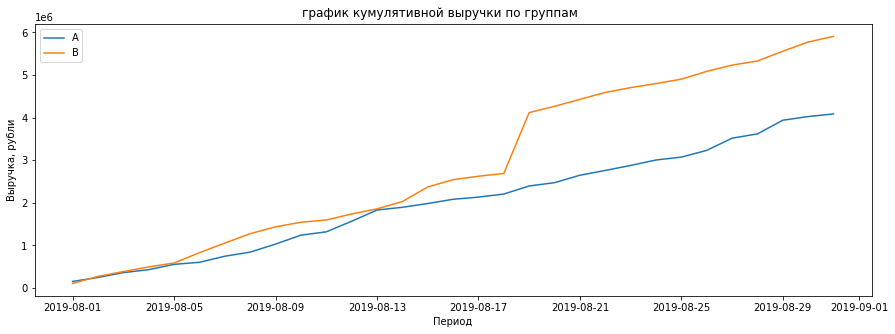

In [21]:
plt.figure(figsize=(15,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Период')
plt.ylabel('Выручка, рубли')
plt.figtext(.5,.9,'график кумулятивной выручки по группам', fontsize=12, ha='center')
plt.legend() 

- Первый отрезок времени обе группы шли рядом,  5 августа разошлись в пользу **группы В**, сошлись 8 августа и дальше **группа В** снова вырывается вперед и лидирует до конца теста

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

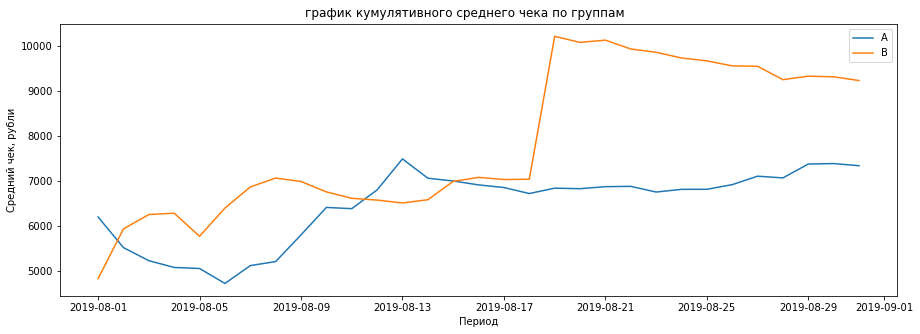

In [22]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Период')
plt.ylabel('Средний чек, рубли')
plt.figtext(.5,.9,'график кумулятивного среднего чека по группам', fontsize=12, ha='center')
plt.legend() 

- Кумулятивное значение среднего чека в обеих группах колеблется. Скорее всего есть выбросы и делать какие-то выводы пока рано.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

- Для построения графика объединияем таблицы **cumulativeRevenueA** и **cumulativeRevenueB**. Она будет содержать столбцы: ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. Сохраняем в переменной **mergedCumulativeRevenue**

Text(0.5, 0.9, 'Относительное изменение кумулятивного среднего чека группы B к группе A')

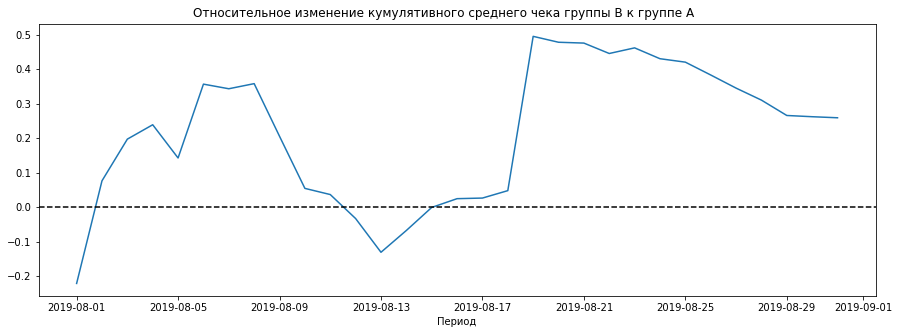

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Период')
plt.figtext(.5,.9,'Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=12, ha='center')

- Видим в несколько дат резкие изменения. Наверное это даты совершения аномальных заказов.

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [24]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


(18109.0, 18139.0, 0.0, 0.05)

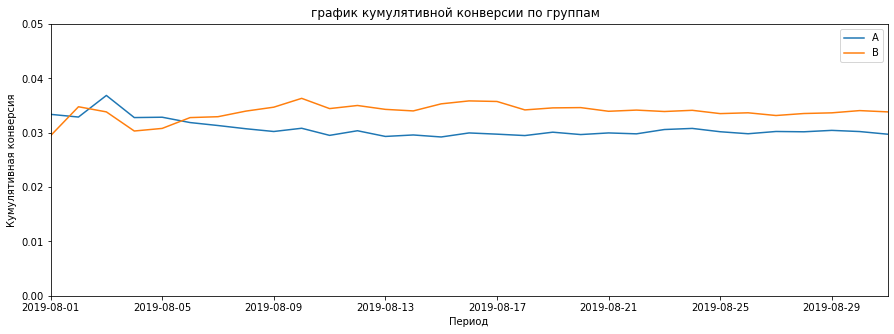

In [25]:
# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Период')
plt.ylabel('Кумулятивная конверсия')
plt.figtext(.5,.9,'график кумулятивной конверсии по группам', fontsize=12, ha='center')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])

- После некоторых колебаний в самом начале теста, где группа В больше уступала, чем выигрывала, она довольно быстро выходит вперед и опережает группу А по конверсии до конца теста. С того же момента оба сегмента выравниваются. Колебания небольшие: от 0,300 до 0,375. 

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

- Для построения графика объединияем таблицы **cumulativeRevenueA** и **cumulativeRevenueB**. Она будет содержать столбцы: ['date', 'conversionA', 'conversionB']. Сохраняем в переменной **mergedCumulativeConversions**

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeConversions

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793
5,2019-08-06,0.031870,0.032783
6,2019-08-07,0.031324,0.032946
7,2019-08-08,0.030731,0.033975
8,2019-08-09,0.030225,0.034699
9,2019-08-10,0.030821,0.036323


Text(0.5, 0.9, 'Относительный прирост конверсии группы B относительно группы A')

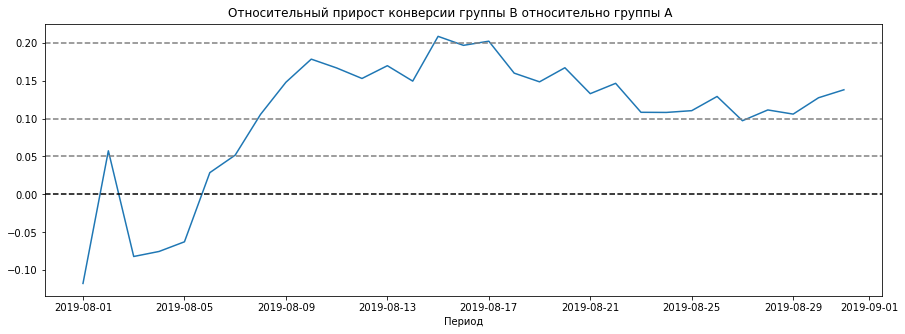

In [27]:
#строим график
plt.figure(figsize=(15,5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
#plt.legend()


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.05, color='grey', linestyle='--')
plt.xlabel('Период')
plt.figtext(.5,.9,'Относительный прирост конверсии группы B относительно группы A', fontsize=12, ha='center')
#plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])

- В начале теста группа B сильно уступала группе A, правда, в один из дней вырывалась вперед до 5%. После 6 августа группа В окончательно уходит вперёд. Разница растет до 17%, падает до 10%, но в данный момент снова идет прирост. Колебания разницы от 10 до 20%. В целом отношение конверсии не выглядит установившимся, и сейчас делать какие-либо выводы по тесту нельзя. Нужно проанализировать аномалии. 

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

-  Создадим из таблицы **orders** датафрейм **ordersByUsers** c двумя столбцами: 'userId' и 'orders' и получим число заказов по пользователям.

In [28]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Text(0.5, 0.9, 'точечный график количества заказов')

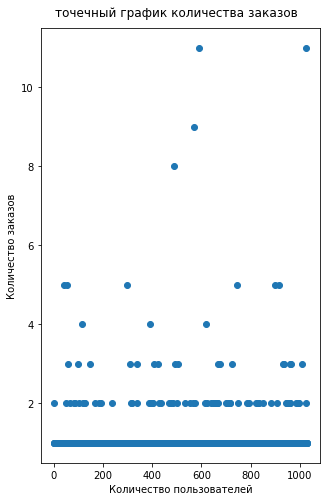

In [29]:
#строим точечный графиц
x_values = pd.Series(range(0, len(ordersByUsers)))

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(5,8))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.figtext(.5,.9,'точечный график количества заказов', fontsize=12, ha='center')

- Пользователей, заказавших 2 и более заказов, не много. Нужно считать и смотреть перцентили, чтобы решить, какое количество заказов можно засчитатать за аномальные.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [30]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


- Не более 5% пользователей делали больше 2 заказов, и не больше 1% пользователей делали больше 4 заказов.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


Text(0.5, 0.9, 'точечный график стоимостей заказов')

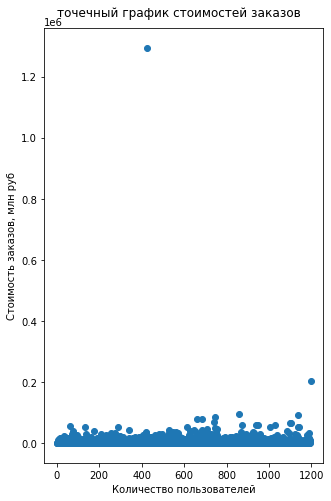

In [31]:
print(orders.sort_values(by='revenue', ascending=False).head(10))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(5,8))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов, млн руб')
plt.figtext(.5,.9,'точечный график стоимостей заказов', fontsize=12, ha='center')


- Визуально выделяются два заказа. Один больше 1 200 000, один около 200 000р.Основная масса заказов в пределах 100 000р. Опять нужно воспользоваться перцентилями.

(0.0, 200000.0)

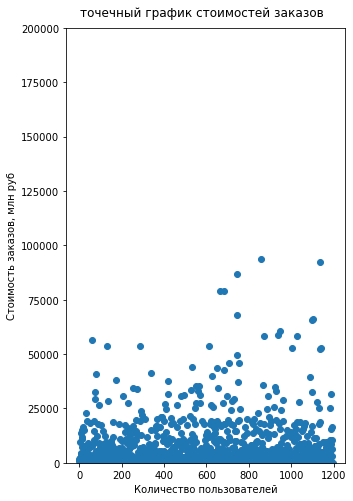

In [32]:
# код ревьюера
plt.figure(figsize=(5,8))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов, млн руб')
plt.figtext(.5,.9,'точечный график стоимостей заказов', fontsize=12, ha='center')
plt.ylim(0,200000)

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [33]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


- Не более 5% заказов на сумму 28 000р, и не больше 1% заказов на сумму 58 233р. 

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

- Создаем переменные **ordersByUsersA** и **ordersByUsersB** со столбцами ['userId', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов.

- Сразу сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

- Переходим к созданию переменных **ordersByUsersA** и **ordersByUsersB**.

In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

- Создаем переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
- Применим критерий и отформатируем p-value.
- Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. 

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
#print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
#print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
alpha=0.05
p_value_conversion_before=round(stats.mannwhitneyu(sampleA, sampleB)[1], 3)
print('p_value=', p_value_conversion_before)
if (p_value_conversion_before < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
win_conversion_before= round(sampleB.mean() / sampleA.mean() - 1, 3)   
print('Относительный выигрыш группы B:', win_conversion_before)

p_value= 0.017
Отвергаем нулевую гипотезу
Относительный выигрыш группы B: 0.138


- p-value = 0.017 и оно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 
- Относительный выигрыш группы B равен 13.8%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

- Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [37]:
#print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
#print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


alpha=0.05
p_value_cost_before =round(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1], 3)
print('p_value=', p_value_cost_before)
if (p_value_cost_before < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    

win_cost_before=round(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1, 3)
print('Относительный выигрыш группы B:', win_cost_before)

p_value= 0.729
Не получилось отвергнуть нулевую гипотезу
Относительный выигрыш группы B: 0.259


- р-value значительно больше 0.05. Значит, нулевую гипотезу не отвергаем. 
- средний чек группы B больше среднего чека группы A, разница в 25%.

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

- 95-й и 99-й перцентили средних чеков - **28 000р и 58 233р**. 
- 95-й и 99-й перцентили количества заказов на одного пользователя - **2 и 4** заказа.
- Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше **2** — **usersWithManyOrders** и пользователей, совершивших заказы дороже **28 000** — **usersWithExpensiveOrders**. Объединим их в таблице **abnormalUsers**.

- Гипотезы по-прежнему: нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

In [38]:
#запишем заказы и сумму в переменные
too_many_orders=2
too_much_cost=28000


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > too_many_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > too_many_orders]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > too_much_cost]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


In [39]:
# код ревьюера
round(np.percentile(orders['revenue'], [95])[0])

28000

- Всего 74 аномальных пользователя.

- В переменные **sampleAFiltere** и **sampleBFiltered** запишем "очищенные" от аномальных пользователей данные.

In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

- Применим статистический критерий Манна-Уитни к полученным данным:

In [41]:
print('По сырым данным было: p-value=', p_value_conversion_before, ',', 'относительный выигрыш группы B:', win_conversion_before)
print('Результат по очищенным данным:')
#print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
#print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p_value_conversion_after =round(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1], 3)
win_conversion_after =round(sampleBFiltered.mean()/sampleAFiltered.mean()-1, 3)

alpha=0.05

print('p_value=', p_value_conversion_after)
if (p_value_conversion_after < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Относительный выигрыш группы B:', win_conversion_after)


По сырым данным было: p-value= 0.017 , относительный выигрыш группы B: 0.138
Результат по очищенным данным:
p_value= 0.013
Отвергаем нулевую гипотезу
Относительный выигрыш группы B: 0.173


- p-value = 0.013 и он опять меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 
- Относительный выигрыш группы B немного вырос, теперь он равен 17.3%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

- По-прежнему нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [42]:
print('По сырым данным было: p-value=', p_value_cost_before,',', 'относительный выигрыш группы B:', win_cost_before)
print('Результат по очищенным данным:')


p_value_cost_after =round(stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1], 3)
win_cost_after =round(orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1, 3)

alpha=0.05

print('p_value=', p_value_cost_after)
if (p_value_cost_after < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Относительный выигрыш группы B:', win_cost_after)


По сырым данным было: p-value= 0.729 , относительный выигрыш группы B: 0.259
Результат по очищенным данным:
p_value= 0.738
Не получилось отвергнуть нулевую гипотезу
Относительный выигрыш группы B: -0.02


- р-value опять больше 0.05 и увеличился. Значит, нулевую гипотезу не отвергаем. 
- а вот разница среднего чека группы B и группы A после исключения аномалий сократилась, она стала 2%, только теперь в пользу группы А.

### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

- По "сырым" данным гипотезу **"различий в конверсии между группами нет"** отвергли. Вывод - разница в конверсиях есть.
- По "очищенным" данным гипотезу **"различий в конверсии между группами нет"** также отвергли. Различия в конверсиях есть.


- По "сырым" данным гипотезу **"различий в среднем чеке между группами нет"** отвергнуть не смогли. Не можем сделать вывод о различии средних чеков.
- По "очищенным" данным гипотезу **"различий в среднем чеке между группами нет"**  тоже отвергнуть не смогли. Не можем сделать вывод о различии средних чеков.
- По графику различия среднего чека группа В была стабильным лидером при "неочищенных" данных. Правда, после удаления выбросов чеки, можно сказать, сравнялись. 
- А вот по графику относительного прироста конверсии группы B относительно группы A, группа В за несколько дней выходит вперед и сохраняет лидерство до конца периода. Группа В хорошо конвертирует пользователей, несмотря на средний чек.
- Вывод: 1. Остановить тест, зафиксировать победу одной из групп --> **тест можно остановить и признать группу В победителем.**